In [1]:
from stock import Stock

print(Stock(2, 5))

Stock: 2x5 @ (0, 0)


Stock: 5x4 @ (4, 5)
Stock: 9x2 @ (9, 7)
Stock: 2x1 @ (10, 9)
Stock: 5x5 @ (8, 2)


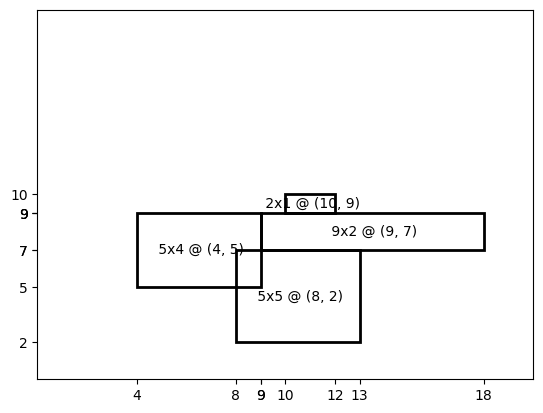

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# draw the rectangle in a canvas
def draw_rectangle(ax, x, y, width, height, color='black', lw=2, fill=False, text=None):
    ax.add_patch(plt.Rectangle((x, y), width, height, fill=fill, facecolor=color, lw=2))
    if text:
        ax.text(x + width / 2, y + height / 2, text, ha='center', va='center')

# draw the stock in a canvas
def draw_stock(ax, stock):
    draw_rectangle(ax, stock.x, stock.y, stock.width, stock.height, text=str(stock).split(':')[-1])


random = np.random.RandomState(409)
stocks = [Stock(*random.randint(10, size=4)+1) for i in range(4)]

fig, ax = plt.subplots()
for stock in stocks:
    print(stock)
    draw_stock(ax, stock)

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
# ax.axis('equal')
# hide the axis ticks just by setting the ticks to an empty list ax.set_xticks([])
ax.set_xticks([stock.x for stock in stocks] + [stock.x + stock.width for stock in stocks])
ax.set_yticks([stock.y for stock in stocks] + [stock.y + stock.height for stock in stocks])
plt.show()


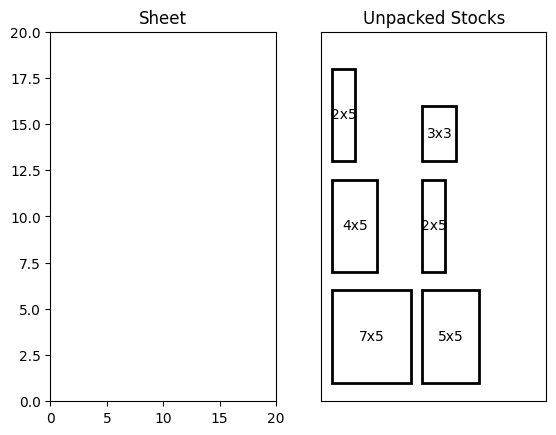

In [3]:
from visualization import VisualSheet
from stock import Stock, Sheet

stocks = [
    Stock(2, 5),
    Stock(2, 5),
    Stock(4, 5),
    Stock(3, 3),
    Stock(5, 5),
    Stock(7, 5),
]

sheet = Sheet(20, 20, stocks=stocks)

visual_sheet = VisualSheet(sheet)
visual_sheet.draw(unpacked=True)